In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime as dt

In [2]:
airbnb=pd.read_csv('/content/drive/MyDrive/airbnb.csv')
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [4]:
airbnb.isna().sum()

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

Text(0.5, 1.0, 'Distrubution of listing rating')

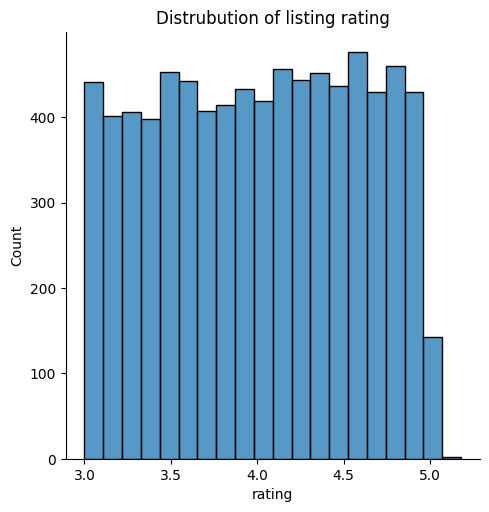

In [5]:
sns.displot(airbnb['rating'],bins=20)
plt.title('Distrubution of listing rating')

In [6]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [7]:
airbnb['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [8]:
airbnb['coordinates']=airbnb['coordinates'].str.replace('(','')
airbnb['coordinates']=airbnb['coordinates'].str.replace(')','')
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [9]:
lat_long=airbnb['coordinates'].str.split(",",expand= True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [10]:
airbnb['latitude']=lat_long[0]
airbnb['longtitude']=lat_long[1]
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longtitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [11]:
airbnb['latitude']=airbnb['latitude'].astype('float')
airbnb['longtitude']=airbnb['longtitude'].astype('float')

In [12]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longtitude            float64
dtype: object

In [13]:
airbnb.drop('coordinates', axis=1, inplace=True)

In [14]:
airbnb['price']=airbnb['price'].str.replace('$','')
airbnb['price']=airbnb['price'].astype('float')

In [15]:
airbnb['price'].mean()

150.90512217564665

In [16]:
airbnb['price'].head()

0     45.0
1    135.0
2    150.0
3     86.0
4    160.0
Name: price, dtype: float64

In [17]:
airbnb[['listing_added','last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [18]:
airbnb['listing_added']=pd.to_datetime(airbnb['listing_added'], format ="%Y-%m-%d")
airbnb['last_review']=pd.to_datetime(airbnb['last_review'], format ="%Y-%m-%d")
airbnb[['listing_added','last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaT
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [19]:
airbnb[['listing_added','last_review']].dtypes

listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object

In [20]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [21]:
airbnb['room_type']=airbnb['room_type'].str.lower()

In [22]:
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [23]:
airbnb['room_type']=airbnb['room_type'].str.strip()

In [24]:
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [25]:
mappings={'private room':'Private Room',
         'private' : 'Private Room',
         'entire home/apt':'Entire Place',
         'shared room':'Shared Room',
         'home' :'Entire Place'
}
airbnb['room_type']=airbnb['room_type'].replace(mappings)

In [26]:
airbnb['room_type'].unique()

array(['Private Room', 'Entire Place', 'Shared Room'], dtype=object)

In [27]:
airbnb=airbnb.fillna({'reviews_per_month': 0,
                     'number_of_stays':0,
                     '5_stars':0})

In [28]:
is_rated=np.where(airbnb['rating'].isna()==True,0,1)
airbnb['is_rated']=is_rated

1)split neighbourhood_full column to borough_neighbourhood which means(borough)&(neighbourhood)

2) drop any (rating)>5.0

3)find duplicates in(listing_id) and remove them

In [4]:
airbnb['neighbourhood_full']

0               Brooklyn, Flatlands
1        Manhattan, Upper West Side
2        Brooklyn, Brooklyn Heights
3        Manhattan, Upper West Side
4        Manhattan, Lower East Side
                    ...            
10014             Manhattan, Harlem
10015        Manhattan, East Harlem
10016        Brooklyn, Clinton Hill
10017        Brooklyn, Clinton Hill
10018    Manhattan, Upper East Side
Name: neighbourhood_full, Length: 10019, dtype: object

In [29]:
airbnb[['borough', 'neighbourhood']] = airbnb['neighbourhood_full'].str.split(', ', expand=True)

In [31]:
airbnb[['borough','neighbourhood']].head()

,borough,neighbourhood
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [32]:
airbnb.drop('neighbourhood_full', axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         10019 non-null  int64         
 1   listing_id         10019 non-null  int64         
 2   name               10014 non-null  object        
 3   host_id            10019 non-null  int64         
 4   host_name          10017 non-null  object        
 5   room_type          10019 non-null  object        
 6   price              9781 non-null   float64       
 7   number_of_reviews  10019 non-null  int64         
 8   last_review        7944 non-null   datetime64[ns]
 9   reviews_per_month  10019 non-null  float64       
 10  availability_365   10019 non-null  int64         
 11  rating             7944 non-null   float64       
 12  number_of_stays    10019 non-null  float64       
 13  5_stars            10019 non-null  float64       
 14  listin

In [33]:
count_greater_than_5 = (airbnb['rating'] > 5.0).sum()

print("Number of rows with rating > 5.0:", count_greater_than_5)

Number of rows with rating > 5.0: 3


In [34]:
airbnb = airbnb[airbnb['rating'] <= 5.0]

In [35]:
count_greater_than_5 = (airbnb['rating'] > 5.0).sum()

print("Number of rows with rating > 5.0:", count_greater_than_5)

Number of rows with rating > 5.0: 0


In [36]:
duplicate_rows_before = airbnb[airbnb.duplicated('listing_id', keep=False)]
airbnb.drop_duplicates('listing_id', inplace=True)
duplicate_rows_after = airbnb[airbnb.duplicated('listing_id', keep=False)]

print("Number of duplicates before removal:", len(duplicate_rows_before))
print("Number of duplicates after removal:", len(duplicate_rows_after))


Number of duplicates before removal: 32
Number of duplicates after removal: 0
